In [1]:
import wandb
import pickle
import numpy as np
from MountainCarEnv import MountainCarEnv
from QLearning import QLearning

In [2]:
qLearningCar = QLearning("rgb_array")

In [4]:
divPos = qLearningCar.env.observation_space.shape[0]
divVel = 9

In [7]:
qLearningCar.discretizar(divPos, divVel) #pasar variables de discretizacion desde ipynb

In [8]:
pickle_in = open("Best_Q_-133.pkl","rb")
Old_Q = pickle.load(pickle_in)

In [9]:
qLearningCar.setQ(Old_Q)

In [ ]:
iterations = 10000
alpha = 0.1 #learning_rate: variacion permitida
epsilon = 1 #exploration_rate:  más grande mas exploracion
gamma = 0.99  #discount_factor: futuro - ¿¿¿learning rate???? - mas bajo mas greedy
exploration_decay_rate = 0.001
min_eps_before_decay = 1000

Q, initial_state_Q_list, epsilon_decay_list = qLearningCar.qLearning_bajar_epsilon_1
(
    iterations, 
    alpha, 
    epsilon, 
    gamma, 
    min_eps_before_decay
)


In [ ]:
iterations = 10000
epsilon = 1 
gamma = 0.99 
min_eps_before_decay = 1000
initial_alpha = 0.5
final_alpha = 0.1

Q, initial_state_Q_list, epsilon_decay_list = qLearningCar.qLearning_decay_learning_rate_2(
    iterations, 
    initial_alpha, 
    final_alpha, 
    epsilon, 
    gamma, 
    min_eps_before_decay
)

In [ ]:
iterations = 10000
alpha = 0.1
epsilon = 1
min_eps_before_decay = 1000
initial_alpha = 0.5
final_alpha = 0.1
initial_gamma = 0.999
final_gamma = 0.95

Q, initial_state_Q_list, epsilon_decay_list = qLearningCar.qLearning_decay_gamma(
    iterations, 
    initial_alpha, 
    final_alpha, 
    epsilon, 
    initial_gamma, 
    final_gamma, 
    min_eps_before_decay
)

In [ ]:
alpha = 0.1
epsilon = 1
gamma = 0.99 
exploration_decay_rate = 0.001
min_eps_before_decay = 1000

iterations_per_run = 20000
iterations_total = 0
best_score = -500
pickle_count = 0
meta_iteration_count = 1
best_Q = qLearningCar.Q
while(iterations_total < 100000):
    Q, initial_state_Q_list, epsilon_decay_list = qLearningCar.qLearning_bajar_epsilon_1(iterations_per_run, alpha, epsilon, gamma, min_eps_before_decay)
    test_value = qLearningCar.execute(100)
    
    if(test_value > best_score):
        best_score = test_value
        pickle_out = open('New_Q_' + str(pickle_count) + "_" + str(test_value) +'.pkl', 'wb')
        pickle.dump(Q, pickle_out)
        pickle_out.close()
        pickle_count += 1
        best_Q = Q
        
    iterations_total += iterations_per_run
    print(iterations_total)
    print("V(Q) = " + str(test_value))

    meta_iteration_count += 1

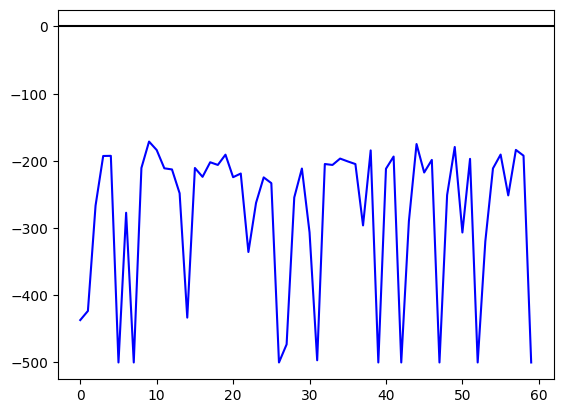

In [31]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, len(qLearningCar.rewards)), qLearningCar.rewards, color='blue')